In [1]:
import numpy as np

primes = []
firstLine = True
with open("primes1.txt", 'r') as fobj:
    for line in fobj:
        if firstLine:
            firstLine = False
            continue
        numbers = [int(num) for num in line.split()]
        primes.extend(numbers)

primes = np.array(primes)
bit_count = 24
powersof2 = 1 << np.arange(bit_count).astype("uint32")
primes_bit = ((primes[:,None] & powersof2) > 0).astype(int)
np.dot(primes_bit[-1],powersof2)==primes[-1]

True

In [21]:
from keras.layers import Input, Dense, BatchNormalization, Activation, Dropout
from keras.models import Model

input_bits = Input(shape=(bit_count,))
encoded = input_bits
for i in range(bit_count-1,4,-1):
    encoded = Dense(i)(encoded)
    encoded = BatchNormalization()(encoded)
    encoded = Activation("relu")(encoded)
    encoded = Dropout(0.8)(encoded)
decoded = Dense(4, activation='sigmoid')(encoded)
for i in range(5,bit_count):
    decoded = Dense(i)(decoded)
    decoded = BatchNormalization()(decoded)
    decoded = Activation("relu")(decoded)
    decoded = Dropout(0.8)(decoded)
decoded = Dense(bit_count, activation='sigmoid')(decoded)
autoencoder = Model(input_bits, decoded)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 24)                0         
_________________________________________________________________
dense_122 (Dense)            (None, 23)                575       
_________________________________________________________________
batch_normalization_77 (Batc (None, 23)                92        
_________________________________________________________________
activation_39 (Activation)   (None, 23)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 22)                528       
_________________________________________________________________
batch_normalization_78 (Batc (None, 22)                88        
__________

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(primes_bit, test_size=0.05, random_state=42)

In [22]:
import keras.backend as K
import tensorflow as tf
import math
tfPowersof2 = tf.constant(powersof2.astype("float32"), shape=[bit_count, 1])
def custom_mse(y_true, y_pred):
    return K.mean(K.square(K.dot(y_true-tf.atan(tf.tan(math.pi*y_true))/math.pi,tfPowersof2)-K.dot(y_pred-tf.atan(tf.tan(math.pi*y_pred))/math.pi,tfPowersof2)), axis=-1)
autoencoder.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [23]:
%matplotlib inline

from matplotlib import pyplot as plt
from IPython.display import clear_output
import keras

class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

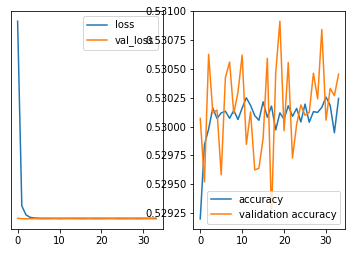

Epoch 35/1000
619776/950000 [==================>...........] - ETA: 1:38 - loss: 0.6634 - acc: 0.530

KeyboardInterrupt: 

In [24]:
autoencoder.fit(X_train, X_train,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[plot],
                verbose=1)

In [25]:
(autoencoder.predict(primes_bit[100:102])>0.5)-primes_bit[100:102]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\edward\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-25-9104ad91f450>", line 1, in <module>
    (autoencoder.predict(primes_bit[100:102])>0.5)-primes_bit[100:102]
  File "c:\users\edward\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1815, in predict
    x = _standardize_input_data(x, self._feed_input_names,
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\edward\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 1863, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):

KeyboardInterrupt: 

array([[1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])